In [1]:
# Source: http://archive.ics.uci.edu/ml/datasets/heart+disease

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# We'll need this packaged to display our model
from sklearn import tree

# Useful for displaying visualizations
from IPython.display import Image

# Packages for rendering our tree
import pydotplus
import graphviz

In [3]:
data = pd.read_csv('Data\\processed.cleveland.data', delimiter=',', header =None, encoding ='latin8')
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = data[data.ca != '?']
data = data[data.thal != '?']

Y = pd.DataFrame()
Y['condition'] = data['num']
data.drop(['num'], axis = 1, inplace = True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


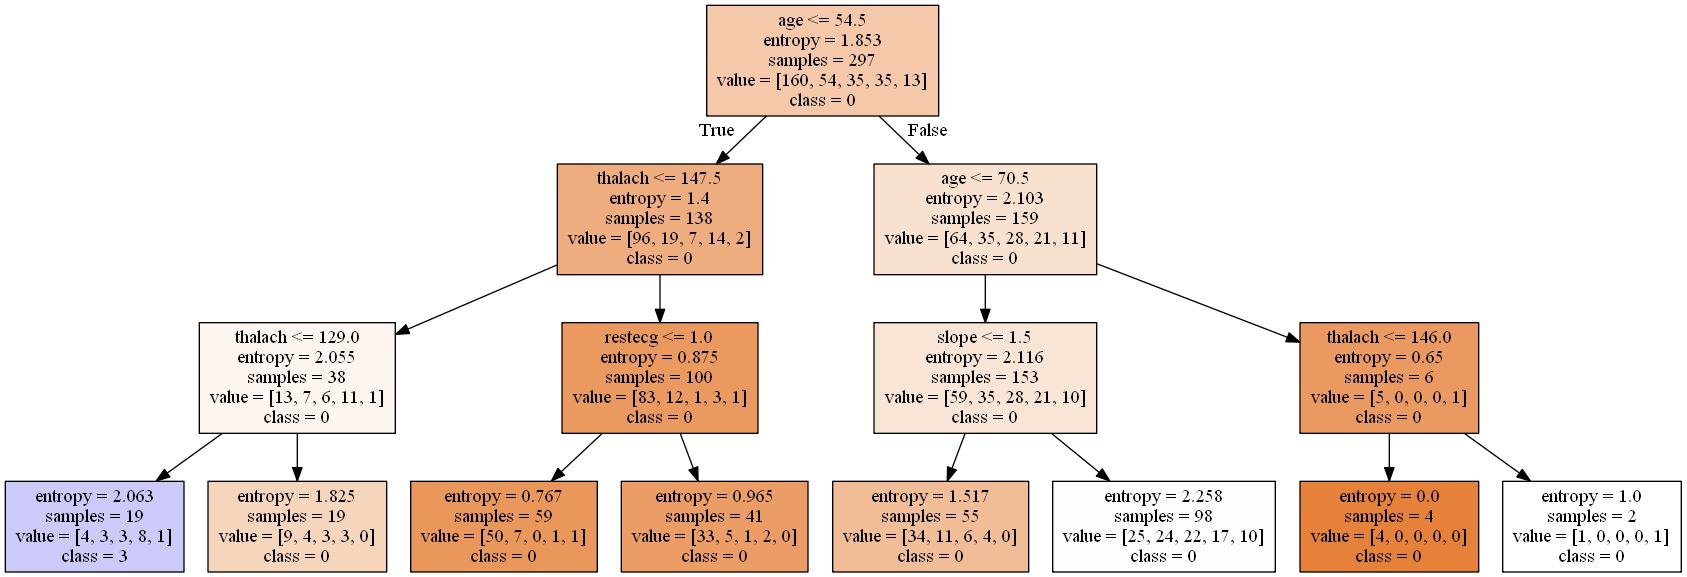

In [11]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=3,
    random_state = 1337
)
decision_tree.fit(data, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=data.columns,
    class_names = ['0', '1','2','3','4'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = data

cross_val_score(rfc, X, Y, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

array([0.5625    , 0.53125   , 0.625     , 0.61290323, 0.56666667,
       0.57142857, 0.46428571, 0.57142857, 0.67857143, 0.64285714])

In [13]:
# Create correlation matrix with the  columns
correlation_matrix = X.corr()
display(correlation_matrix)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037


In [46]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5).fit_transform(X, Y)
selector

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[150. ,   0. ,   2.3,   0. ,   6. ],
       [108. ,   1. ,   1.5,   3. ,   3. ],
       [129. ,   1. ,   2.6,   2. ,   7. ],
       ...,
       [141. ,   0. ,   3.4,   2. ,   7. ],
       [115. ,   1. ,   1.2,   1. ,   7. ],
       [174. ,   0. ,   0. ,   1. ,   3. ]])

In [47]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=3,
    random_state = 1337
)
decision_tree.fit(data, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=data.columns,
    class_names = ['0', '1','2','3','4'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'